In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/salary.csv")
df

,Income,Age
0,50000,45
1,70000,30
2,40000,55
3,65000,30
4,77000,59
5,85000,39
6,55000,68
7,49000,45
8,93000,24
9,50000,30


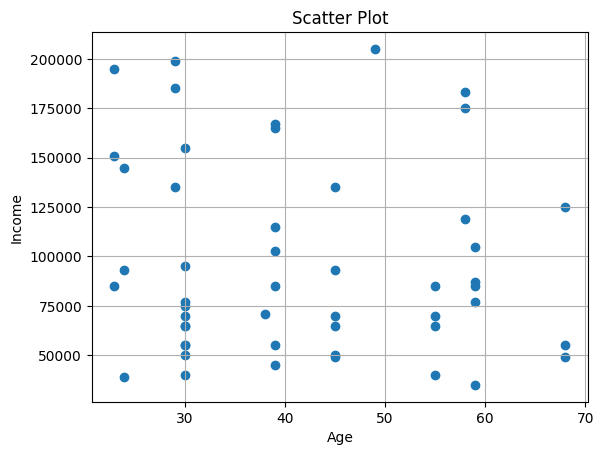

In [4]:
plt.scatter(df['Age'], df['Income'])
plt.title("Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(True)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
df['clusters'] = y_pred
df

,Income,Age,clusters
0,50000,45,0
1,70000,30,0
2,40000,55,0
3,65000,30,0
4,77000,59,0
5,85000,39,0
6,55000,68,0
7,49000,45,0
8,93000,24,0
9,50000,30,0


In [9]:
km.cluster_centers_

array([[4.23823529e+01, 6.77352941e+04],
       [4.00000000e+01, 1.59625000e+05]])

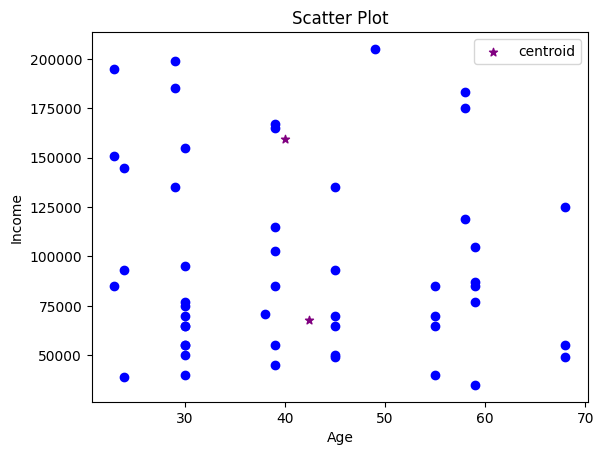

In [10]:
df1 = df[df['clusters'] == 0]
df2 = df[df['clusters'] == 1]
plt.scatter(df1['Age'], df1['Income'], color = "blue")
plt.scatter(df2['Age'], df2['Income'], color = "blue")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "purple", marker = "*", label = "centroid")
plt.title("Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

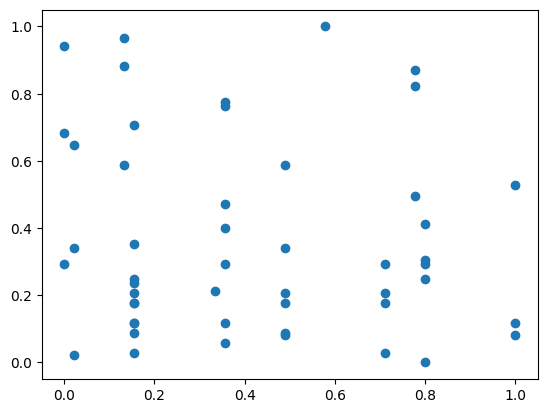

In [20]:
plt.scatter(df['Age'], df['Income'])
plt.show()

In [21]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [22]:
df['clusters'] = y_pred
df

,Income,Age,clusters
0,0.088235,0.488889,1
1,0.205882,0.155556,1
2,0.029412,0.711111,0
3,0.176471,0.155556,1
4,0.247059,0.800000,0
5,0.294118,0.355556,1
6,0.117647,1.000000,0
7,0.082353,0.488889,1
8,0.341176,0.022222,1
9,0.088235,0.155556,1


In [23]:
km.cluster_centers_

array([[0.81709402, 0.24524887],
       [0.25648148, 0.20220588],
       [0.3008547 , 0.78733032]])

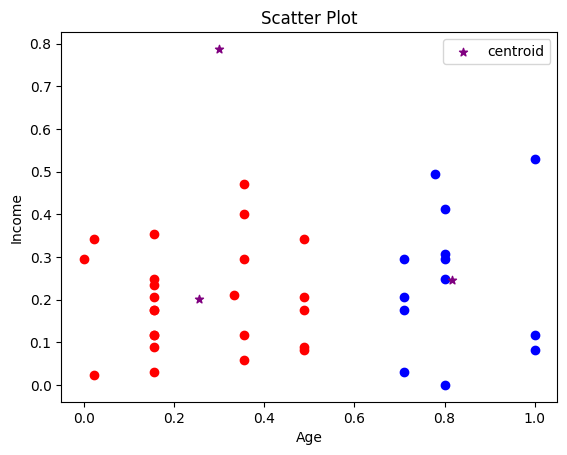

In [26]:
df1 = df[df['clusters'] == 0]
df2 = df[df['clusters'] == 1]
df3 = df[df['clusters'] == 2]
plt.scatter(df1['Age'], df1['Income'], color = "blue")
plt.scatter(df2['Age'], df2['Income'], color = "red")
# plt.scatter(df3['Age'], df3['Income'], color = "yellow")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "purple", marker = "*", label = "centroid")
plt.title("Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

# **Elbow Plot**

In [27]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit_transform(df[['Age', 'Income']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

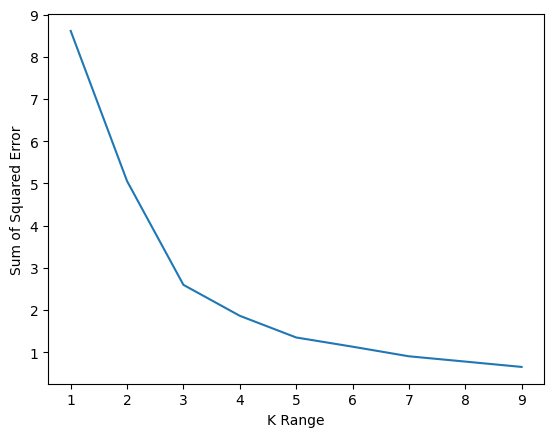

In [29]:
plt.plot(k_rng, sse)
plt.xlabel("K Range")
plt.ylabel("Sum of Squared Error")
plt.show()